<a href="https://colab.research.google.com/github/SamarBaghdadi/CodingDojo_DS_V23/blob/new-main-branch/Univariate_categorical_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [2]:
#Loading Data
fname="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-cleaned_eda.csv"
df=pd.read_csv(fname)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PID               2930 non-null   int64  
 1   MS Zoning         2930 non-null   object 
 2   Lot Frontage      2930 non-null   int64  
 3   Lot Area          2930 non-null   int64  
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   Utilities         2930 non-null   object 
 7   Neighborhood      2930 non-null   object 
 8   Bldg Type         2930 non-null   object 
 9   House Style       2930 non-null   object 
 10  Overall Qual      2930 non-null   int64  
 11  Overall Cond      2930 non-null   int64  
 12  Year Built        2930 non-null   int64  
 13  Year Remodeled    2930 non-null   int64  
 14  Exter Qual        2930 non-null   object 
 15  Exter Cond        2930 non-null   object 
 16  Bsmt Unf Sqft     2930 non-null   float64


,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month Sold,Year Sold,Total Full Baths,Total Half Bath
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


In [6]:
#Using Select dtypes to get names of categorical columns
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Utilities', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Central Air',
       'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence'],
      dtype='object')

In [9]:
#Checking how many categories in each column
df[cat_cols].nunique()

,0
MS Zoning,7
Street,2
Alley,3
Utilities,3
Neighborhood,28
Bldg Type,5
House Style,8
Exter Qual,4
Exter Cond,5
Central Air,2


In [10]:
#Saving the value counts
val_counts=df["Alley"].value_counts()
val_counts

,count
Alley,
MISSING,2732
Grvl,120
Pave,78


Text(0.5, 0, 'Alley')

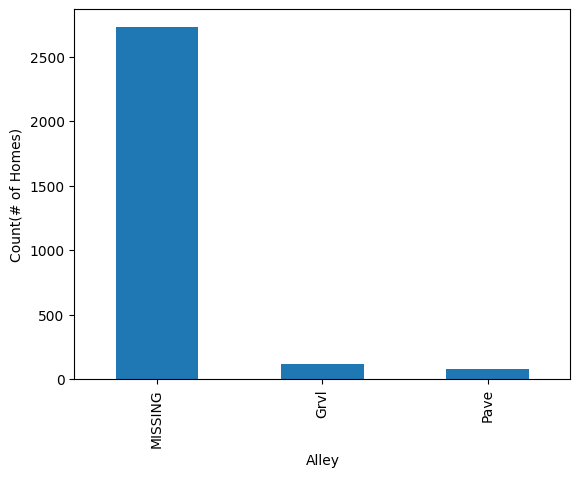

In [11]:
#Plotvalue counts as a bar graph
ax=val_counts.plot(kind='bar')
ax.set_ylabel('Count(# of Homes)')
ax.set_xlabel('Alley')

In [12]:
#Saving the Normalized value Counts
val_counts_norm=df['Alley'].value_counts(normalize=True)*100
val_counts_norm

,proportion
Alley,
MISSING,93.242321
Grvl,4.095563
Pave,2.662116


Text(0.5, 0, 'Alley')

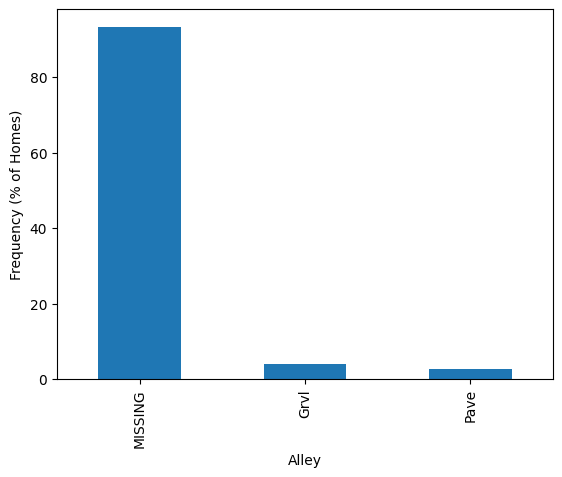

In [13]:
#Plot value counts as a bar graph
ax=val_counts_norm.plot(kind='bar')
ax.set_ylabel("Frequency (% of Homes)")
ax.set_xlabel("Alley")

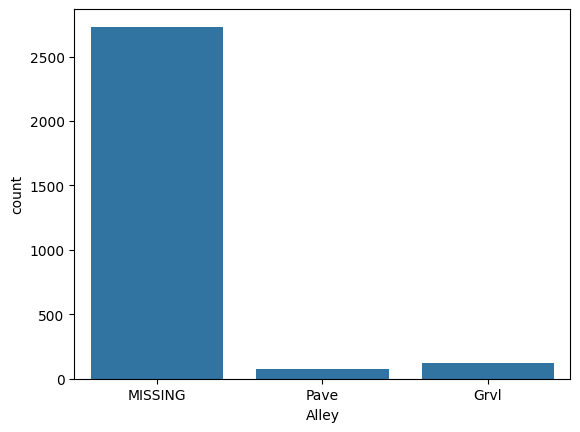

In [14]:
#Seaborn countplot
ax=sns.countplot(data=df,x="Alley")

In [15]:
#Checking the unique in cat_cols
df[cat_cols].nunique()

,0
MS Zoning,7
Street,2
Alley,3
Utilities,3
Neighborhood,28
Bldg Type,5
House Style,8
Exter Qual,4
Exter Cond,5
Central Air,2


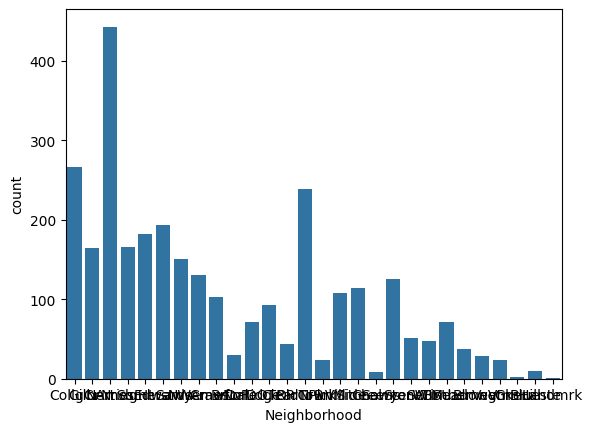

In [16]:
#countplot with many categories
ax=sns.countplot(data=df,x="Neighborhood")

<ipython-input-19-06228e0e7968>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


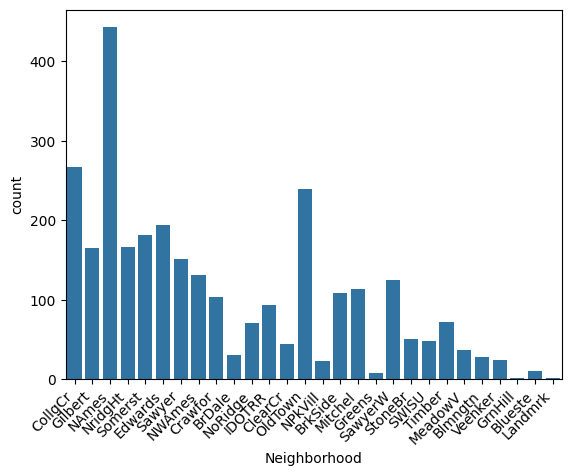

In [19]:
#Countplot with many categories, rotate labels
ax=sns.countplot(data=df,x="Neighborhood");
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

In [20]:
#Saving the value_counts to use with seaborn
val_counts=df['Neighborhood'].value_counts()
val_counts

,count
Neighborhood,
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131


In [21]:
val_counts.index

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'NridgHt',
       'Gilbert', 'Sawyer', 'NWAmes', 'SawyerW', 'Mitchel', 'BrkSide',
       'Crawfor', 'IDOTRR', 'Timber', 'NoRidge', 'StoneBr', 'SWISU', 'ClearCr',
       'MeadowV', 'BrDale', 'Blmngtn', 'Veenker', 'NPkVill', 'Blueste',
       'Greens', 'GrnHill', 'Landmrk'],
      dtype='object', name='Neighborhood')

<ipython-input-24-33217a532949>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=70,ha='right');


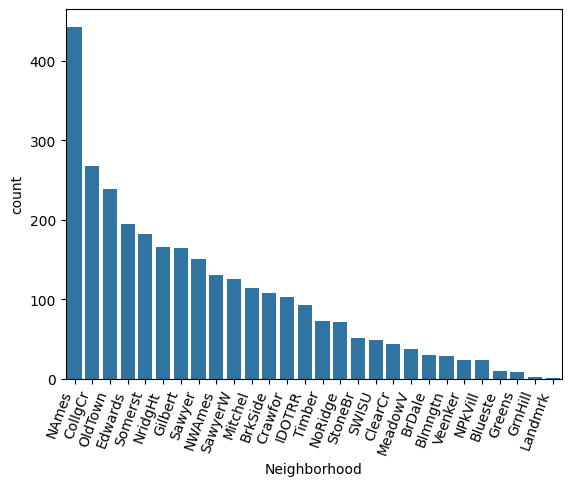

In [24]:
# Creating a countplot with seaborn (ordered by count using .index)
ax=sns.countplot(data=df,x='Neighborhood',order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70,ha='right');